# Import Libraries

In [74]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import time 

#preprocessing
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

#plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style ='whitegrid')
pd.set_option('display.max_columns',100000)


# Exploratory Data Analysis 


In [75]:
train_df=pd.read_csv('../input/credit-score-classification/train.csv',dtype={'Payment_Behaviour': 'str'})

In [76]:
train_df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [77]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

<AxesSubplot:>

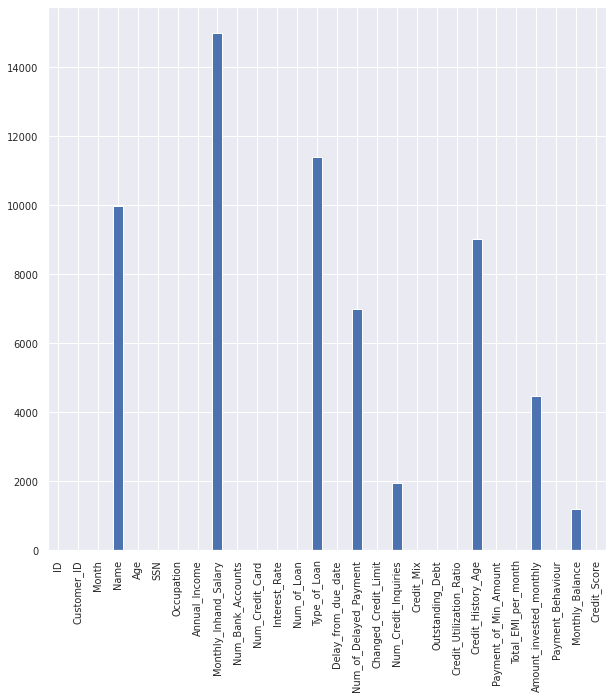

In [78]:
sns.set(rc={'figure.figsize':(10,10)}, font_scale=0.9)
train_df.isna().sum().plot(kind='bar')

In [79]:
train_df.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [80]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [81]:
# check imbalance data 
train_df['Credit_Score'].value_counts(normalize=True)

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

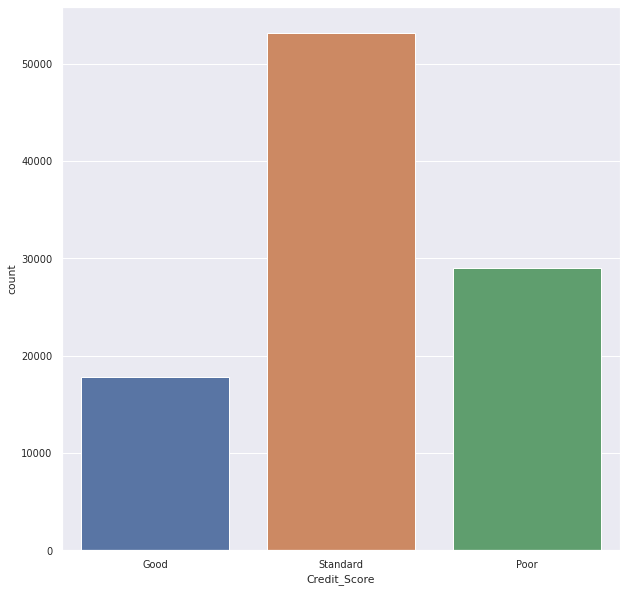

In [82]:
sns.countplot(x=train_df['Credit_Score'])

In [83]:
for col in train_df.columns:
    print(col)
    print(train_df[col].unique()) 
    print('======') 

ID
['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']
Customer_ID
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Name
['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
Age
['23' '-500' '28_' ... '4808_' '2263' '1342']
SSN
['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Annual_Income
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Monthly_Inhand_Salary
[1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333]
Num_Bank_Accounts
[   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649 

Hypothesis:
1- Each customer have a record of data for from Junauary to August in train data and from September to December in test data this will help in fill null value or mistake values in the columns that I suppose that not change from month to onther such as Age,SSN,Occupation ,Num_Bank_Accounts,Num_Credit_Card,and Credit_Mix
2- calculate impute (median, mean,mode) depend on groupby for each customer instead of all values in the columns

#  Data Cleaning 

In [84]:
# Categorical Cols

categorical_cols=[]
for col in train_df.columns:
    if train_df[col].dtype=='object':
        categorical_cols.append(col) 
categorical_cols


['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [85]:
# replace mistake value with nan as much as possible

for col in categorical_cols:
    train_df[col] = train_df[col].replace({'!@9#%8':'NAN_spent_NAN_value_payments', '#F%$D@*&8':'NAN-00-000','_______':np.nan,'__-333333333333333333333333333__':np.nan,'NM':np.nan,'_':np.nan,'__10000__':np.nan})

In [86]:
# remove _ from some data
strip_list=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment', 'Outstanding_Debt']

for col in strip_list:
    train_df[col]=train_df[col].str.strip("_")

In [87]:
train_df['Age'] = train_df['Age'].astype(int)  

train_df['Age']=np.where (train_df['Age']>75, np.NAN,train_df['Age'])

In [88]:
train_df['area']=train_df['SSN'].apply(lambda x:x.split('-')[0])

train_df.insert(5, 'Area', train_df['area'])


train_df['Area']=train_df['Area'].replace('NAN',np.NAN)

In [89]:
# Change type  of some features
type_col=['Area','Monthly_Inhand_Salary','Monthly_Balance','Num_of_Delayed_Payment','Outstanding_Debt','Amount_invested_monthly', 'Annual_Income', 'Num_of_Loan', 'Changed_Credit_Limit']

for col in type_col:
    train_df[col]=train_df[col].astype(float)

# Feature Engeering 

In [90]:
train_df["AgeLevel"]=pd.cut(train_df["Age"],4,labels=["childern","youth","adult","Seniors"])


In [91]:
train_df['New_Payment_Behaviour']=train_df['Payment_Behaviour'].apply(lambda x:x.split('_value_')[0].replace('_spent_',''))

In [92]:
# calculate Credit_History_Age by months

train_df['Credit_History_Age']=train_df['Credit_History_Age'].replace(np.NAN,'0 Years and 0 Months')

train_df['year']=train_df['Credit_History_Age'].apply(lambda x:x.split('and')[0]).str.replace('Years','')

train_df['year']=pd.to_numeric(train_df['year'],errors='coerce').apply(lambda x: x*12)
train_df['year'].dtypes

train_df['month']=train_df['Credit_History_Age'].apply(lambda x:x.split('and')[1]).str.replace('Months','')

train_df['month']=pd.to_numeric(train_df['month'],errors='coerce')
train_df['month'].dtypes

train_df['New_Credit_History_Age (months)']=train_df['year']+train_df['month']

# Preprocessing

In [93]:
# Convert Catogrical Data

dict={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,'August':8,'September':9, 'October':10, 'November':11, 'December':12}
train_df['Month']=train_df['Month'].map(dict)

from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
enc_list=['Credit_Score','Payment_of_Min_Amount','Occupation','Credit_Mix','AgeLevel','New_Payment_Behaviour']
for col in enc_list:
    train_df[col]=lb.fit_transform(train_df[col])

In [94]:
# Missing values
def display_missing_data(df):
    missing_data = df.isnull().sum().reset_index()
    missing_data = missing_data.rename({'index': 'col', 0: 'null'}, axis=1)
    missing_data['null_percenatage'] = missing_data['null'] / len(df)
    missing_data = missing_data.loc[missing_data['null'] > 0]
    return missing_data

print(display_missing_data(train_df))

                        col   null  null_percenatage
3                      Name   9985           0.09985
4                       Age   1895           0.01895
5                      Area   5572           0.05572
9     Monthly_Inhand_Salary  15002           0.15002
14             Type_of_Loan  11408           0.11408
16   Num_of_Delayed_Payment   7002           0.07002
17     Changed_Credit_Limit   2091           0.02091
18     Num_Credit_Inquiries   1965           0.01965
25  Amount_invested_monthly   8784           0.08784
27          Monthly_Balance   1209           0.01209


In [95]:
# calculate   (median, mean,mode) depend on groupby

group_list=['Age','Monthly_Inhand_Salary','Payment_of_Min_Amount','Monthly_Balance','Changed_Credit_Limit','Changed_Credit_Limit','Num_of_Delayed_Payment','Num_Credit_Inquiries','Amount_invested_monthly']

for col3 in group_list:
    
    train_df[col3] = train_df.groupby(['Customer_ID'], sort=False)[col3].apply(lambda x: x.fillna(x.median()))

In [96]:
group_list2=['Area','Occupation','Payment_of_Min_Amount','Credit_Mix','New_Payment_Behaviour']

for col4 in group_list2:
    
    train_df[col4] = train_df.groupby(['Customer_ID'], sort=False)[col4].apply(lambda x: x.fillna(x.mode()[0]))

In [97]:
train_df.drop( axis= 1,columns=['ID','Customer_ID','Name','Age','area','SSN','Credit_History_Age','Payment_Behaviour','Type_of_Loan','year','month'],inplace = True)

# Visulaztion 

<AxesSubplot:ylabel='None'>

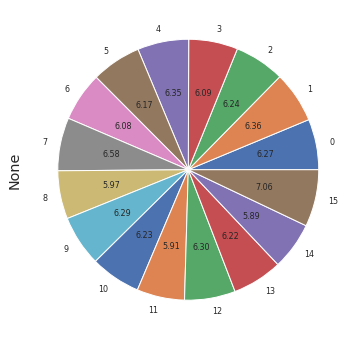

In [98]:
sns.set(rc={'figure.figsize':(6,6)}, font_scale=1.2)
train_df.groupby('Occupation').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 8})

<AxesSubplot:xlabel='Credit_Score', ylabel='Num_Bank_Accounts'>

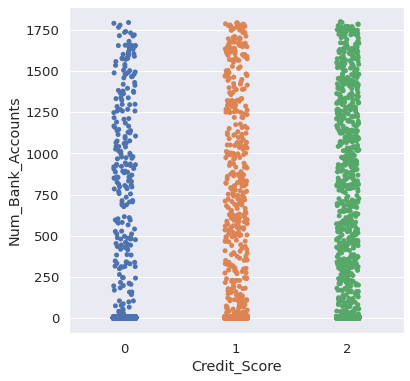

In [99]:
sns.stripplot(x='Credit_Score', y='Num_Bank_Accounts', data=train_df)

<AxesSubplot:xlabel='Credit_Mix', ylabel='Credit_Score'>

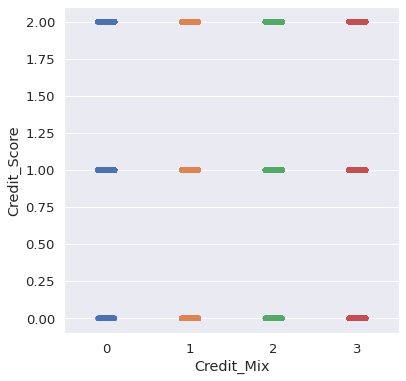

In [100]:
sns.stripplot(x="Credit_Mix",y='Credit_Score', data=train_df)

<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

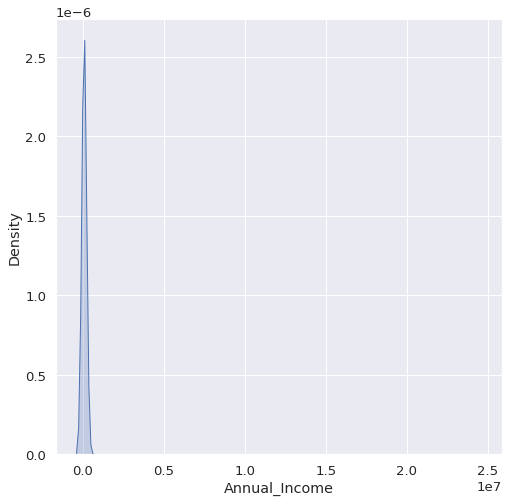

In [101]:
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.2)

sns.kdeplot(train_df['Annual_Income'], shade=True)

<AxesSubplot:ylabel='Monthly_Inhand_Salary'>

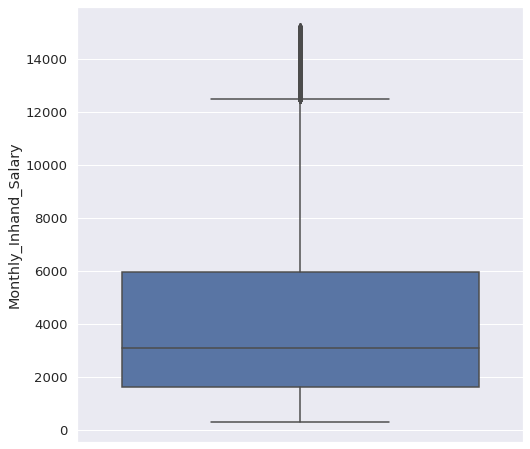

In [102]:
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.2)
sns.boxplot(y='Monthly_Inhand_Salary',data=train_df)

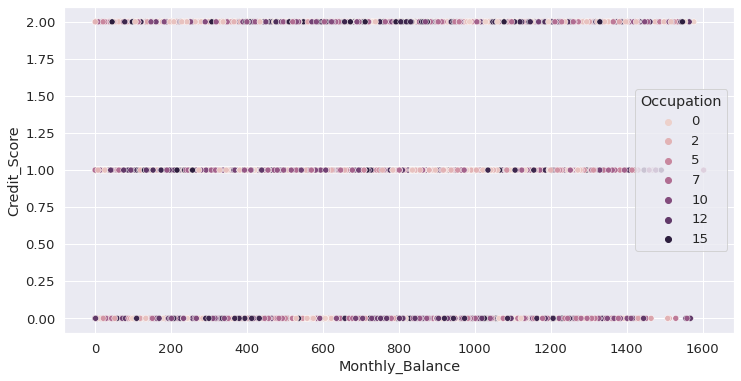

In [103]:
# Bivariate plots
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_df,x='Monthly_Balance',hue='Occupation',y='Credit_Score')
plt.show()

In [104]:
train_df

,Month,Area,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,AgeLevel,New_Payment_Behaviour,New_Credit_History_Age (months)
0,1,821.0,12,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,3,809.98,26.822620,0,49.574949,80.415295,312.494089,0,0,2,265
1,2,821.0,12,19114.12,1824.843333,3,4,3,4.0,-1,6.5,11.27,4.0,1,809.98,31.944960,0,49.574949,118.280222,284.629162,0,0,3,0
2,3,821.0,12,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,1,809.98,28.609352,0,49.574949,81.699521,331.209863,0,1,4,267
3,4,821.0,12,19114.12,1824.843333,3,4,3,4.0,5,4.0,6.27,4.0,1,809.98,31.377862,0,49.574949,199.458074,223.451310,0,0,5,268
4,5,821.0,12,19114.12,1824.843333,3,4,3,4.0,6,6.5,11.27,4.0,1,809.98,24.797347,0,49.574949,41.420153,341.489231,0,0,1,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,78.0,9,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,3.0,3,502.38,34.663572,0,35.104023,60.971333,479.866228,1,0,0,378
99996,5,78.0,9,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,3.0,3,502.38,40.565631,0,35.104023,54.185950,496.651610,1,0,1,379
99997,6,78.0,9,39628.99,3359.415833,4,6,5729,2.0,27,6.0,11.50,3.0,1,502.38,41.255522,0,35.104023,24.028477,516.809083,1,0,0,380
99998,7,78.0,9,39628.99,3359.415833,4,6,7,2.0,20,6.0,11.50,3.0,1,502.38,33.638208,0,35.104023,251.672582,319.164979,2,0,3,381


In [105]:
# Feature Selection
X= train_df.drop(['Credit_Score'], axis=1)
Y= train_df['Credit_Score']
#from sklearn.feature_selection import f_regression, mutual_info_regression
#from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

all_features = X.columns
all_features

import lightgbm as lgb
#model = XGBRegressor()
#model=RandomForestRegressor(n_estimators=100,max_depth=2, random_state=33)
model=lgb.LGBMRegressor(num_leaves=50,learning_rate=0.005,n_estimators=40)
#model=RandomForestClassifier(n_estimators=70)

#selector = SelectKBest(k=60, score_func=f_regression)
#selector = SelectKBest(k=40, score_func=mutual_info_regression)
#selector = SelectPercentile(percentile=50, score_func=mutual_info_regression)
selector = SelectFromModel(estimator=model)

selector.fit(X, Y)

SelectFromModel(estimator=LGBMRegressor(learning_rate=0.005, n_estimators=40,
                                        num_leaves=50))

In [106]:
selected_features_idx = selector.get_support(indices=True)
selected_features_idx

array([ 0,  4,  5,  6,  7,  9, 10, 13, 14, 17])

In [107]:
selected_features = all_features[selected_features_idx]
selected_features

Index(['Month', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Credit_Mix', 'Outstanding_Debt',
       'Total_EMI_per_month'],
      dtype='object')

In [108]:
# Scaler data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

scaler.fit(X[selected_features])

X[selected_features] = scaler.transform(X[selected_features])

In [109]:
X= X[selected_features]
Y= train_df['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 10)
(20000, 10)
(80000,)
(20000,)


# Machine Learning Models


In [110]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(kernel='sigmoid'),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(n_estimators=70),
    "XGB": XGBClassifier(n_estimators=70),
    "Naive Bayes": GaussianNB()
}

In [111]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {model.score(X_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print('-'*30)
    print(classification_report(y_test, y_pred))

Training Model LR 
--------------
Training Accuracy: 0.5780625
Testing Accuracy: 0.5795
Testing Confusion Matrix: 
[[ 883   62 2611]
 [ 161 2302 3361]
 [ 670 1545 8405]]
------------------------------
              precision    recall  f1-score   support

           0       0.52      0.25      0.34      3556
           1       0.59      0.40      0.47      5824
           2       0.58      0.79      0.67     10620

    accuracy                           0.58     20000
   macro avg       0.56      0.48      0.49     20000
weighted avg       0.57      0.58      0.55     20000

Training Model KNN 
--------------
Training Accuracy: 0.7287375
Testing Accuracy: 0.61385
Testing Confusion Matrix: 
[[1852  289 1415]
 [ 552 3323 1949]
 [1575 1943 7102]]
------------------------------
              precision    recall  f1-score   support

           0       0.47      0.52      0.49      3556
           1       0.60      0.57      0.58      5824
           2       0.68      0.67      0.67     1062

Best model is  RF accuracy  0.81